In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
P = 8.0
h = 3.2

dxList = []
for iP in range(5):
    for ih in range(6):
        dxList.append([iP, ih, iP * P - ih * h])
dxList = sorted(dxList, key=lambda dxList: dxList[2])


for (ix, dx) in enumerate(dxList):
    print(f"{dx[0:2]}, {dx[2]-6.4:.1f}", end='')
    if ix > 1:
        print(f", {dxList[ix][2] - dxList[ix-1][2]:.1f}")
    else:
        print()

[0, 5], -22.4
[0, 4], -19.2
[0, 3], -16.0, 3.2
[1, 5], -14.4, 1.6
[0, 2], -12.8, 1.6
[1, 4], -11.2, 1.6
[0, 1], -9.6, 1.6
[1, 3], -8.0, 1.6
[0, 0], -6.4, 1.6
[2, 5], -6.4, 0.0
[1, 2], -4.8, 1.6
[2, 4], -3.2, 1.6
[1, 1], -1.6, 1.6
[2, 3], -0.0, 1.6
[1, 0], 1.6, 1.6
[3, 5], 1.6, 0.0
[2, 2], 3.2, 1.6
[3, 4], 4.8, 1.6
[2, 1], 6.4, 1.6
[3, 3], 8.0, 1.6
[2, 0], 9.6, 1.6
[4, 5], 9.6, 0.0
[3, 2], 11.2, 1.6
[4, 4], 12.8, 1.6
[3, 1], 14.4, 1.6
[4, 3], 16.0, 1.6
[3, 0], 17.6, 1.6
[4, 2], 19.2, 1.6
[4, 1], 22.4, 3.2
[4, 0], 25.6, 3.2


In [2]:
pass

## Sequence

| P | h | x | dx | Comment |
|---|---|---|---|---|
|  0|  2|  0|  N/A| Starting configuration |
|  1|  0|  1.6|  1.6||
|  0|  3| 3.2 | 1.6 |
|  1|  1| 4.8 | 1.6 |
|  0|  4| 6.4 | 1.6 |
|  1|  2| 8.0 | 1.6 |
|  2|  0| 9.6 | 1.6 |
|  1|  3|11.2 | 1.6 |
|  2|  1|12.8 | 1.6 |
|  1|  4|14.4 | 1.6 |
|  2|  2|16.0 | 1.6 |



In [3]:
dxListNew = deepcopy(dxList)

for (i, dx) in enumerate(dxListNew):
    if i == 0:
        dx.append(0)
    else:
        dx.append(dx[2] - dxList[i-1][2])
    # print(dx)
dxListNew.pop(0)
dxListNew.pop(0)
dxListNew.pop(19)
dxListNew.pop(13)
dxListNew.pop(7)

print(f"Printing {len(dxListNew)} positions")
for (i, dx) in enumerate(dxListNew):
    print(f"{i}: [{dx[0]:.1f}, {dx[1]:.1f}, {dx[2]+9.6:.1f}, {dx[3]:.1f}]")

Printing 25 positions
0: [0.0, 3.0, -0.0, 3.2]
1: [1.0, 5.0, 1.6, 1.6]
2: [0.0, 2.0, 3.2, 1.6]
3: [1.0, 4.0, 4.8, 1.6]
4: [0.0, 1.0, 6.4, 1.6]
5: [1.0, 3.0, 8.0, 1.6]
6: [0.0, 0.0, 9.6, 1.6]
7: [1.0, 2.0, 11.2, 1.6]
8: [2.0, 4.0, 12.8, 1.6]
9: [1.0, 1.0, 14.4, 1.6]
10: [2.0, 3.0, 16.0, 1.6]
11: [1.0, 0.0, 17.6, 1.6]
12: [2.0, 2.0, 19.2, 1.6]
13: [3.0, 4.0, 20.8, 1.6]
14: [2.0, 1.0, 22.4, 1.6]
15: [3.0, 3.0, 24.0, 1.6]
16: [2.0, 0.0, 25.6, 1.6]
17: [3.0, 2.0, 27.2, 1.6]
18: [4.0, 4.0, 28.8, 1.6]
19: [3.0, 1.0, 30.4, 1.6]
20: [4.0, 3.0, 32.0, 1.6]
21: [3.0, 0.0, 33.6, 1.6]
22: [4.0, 2.0, 35.2, 1.6]
23: [4.0, 1.0, 38.4, 3.2]
24: [4.0, 0.0, 41.6, 3.2]


# Source-Detector Spacing with Lego

Standard Lego brick are very nice for changing the distance between the 
the source and detector in an alpha particle air absorption measurement. 
The Lego bricks are made with very high precision. 

The height between layers of Lego bricks is H = 9.7 mm, and the pitch 
between the posts is P = 8.0 mm. Lego block also come in 1/3 height 
block of height h = 3.2 mm. We glue a short block on the *side* of a 
regular block, so we can set the horizontal distance in increments of 
P and h. 
![](./Figures/Lego_dimensions.png)

In [4]:
h = 3.2
ph = 1.7
H = 9.6
P = 8.0
w = 4.8
sp = (P-w)/2 # 1.6 = space on either side of peg

def one():
    one = np.array([
         [   0,   H],
         [ sp, H],
         [ sp, H+ph],
         [ P-sp, H+ph],
         [ P-sp, H],
         [ P, H],
        ])
    oneX = one[:,0]
    oneY = one[:,1]
    return np.array((oneX, oneY))

def two():
    (oneX, oneY) = one()
    twoX = np.concatenate((oneX, oneX+P))
    twoY = np.concatenate((oneY, oneY))
    return np.array((twoX, twoY))

def four():
    (twoX, twoY) = two()
    fourX = np.concatenate((twoX, twoX+2*P))
    fourY = np.concatenate((twoY, twoY))
    return np.array((fourX, fourY))

def six():
    (twoX, twoY) = two()
    (fourX, fourY) = four()
    sixX = np.concatenate((fourX, twoX+4*P))
    sixY = np.concatenate((fourY, twoY))
    return np.array((sixX, sixY))

def sideOne():
    sideOneX = np.array([-H, -H, -H-ph, -H-ph, -H, -H])
    sideOneY = np.array([0, sp,  sp,  P-sp, P-sp, P])
    return np.array((sideOneX, sideOneY))

def thin():
    thinX = np.array([-h, -h, -h-ph, -h-ph, -h, -h])
    thinY = np.array([0, sp,  sp,  P-sp, P-sp, P])
    return np.array((thinX, thinY))

def cap():
    capX = np.array([-2, -2])
    capY = np.array([0,P])
    return np.array((capX, capY))

tColor = ["darkgray", "gray", "lightgray"]
sColor = ["limegreen", "springgreen", "greenyellow", "lightgreen"]


-14.8 -11.600000000000001


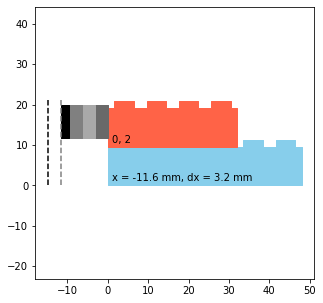

In [5]:
iTop = 0
iThin = 2

fig = plt.figure(figsize=(5,5))
ax = plt.axes()

def drawBase(axZ, yP=0.0):
    # Draw base
    (sixX, sixY) = six()
    axZ.fill_between(sixX, sixY + yP, yP, color="skyblue")

def drawTop(axW, i4, yP=0.0):
    """drawTop: draws top 2x4 with thin 2x1 glued to its side."""
    xDrawW = i4 * P
    # Draw 2 x 4
    (fourX, fourY) = four()
    axW.fill_between(xDrawW + fourX, len(fourY) * (H + yP,), fourY + H + yP, color="tomato")

    # Horizontal 2x1
    ((thinX, thinY)) = thin()
    axW.fill_betweenx(thinY+H+ph+0.5+yP, thinX+xDrawW, x2=xDrawW, color="dimgray")

def drawMount(axV, i4, iTh, yP=0.0):
    # Draw full 2x1 if any
    xi4 = i4 * P # offset for horizontal
    i21 = iTh // 3
    if i21:
        xi21 = xi4 - h
        ((sideOneX, sideOneY)) = sideOne()
        axV.fill_betweenx(sideOneY+H+ph+0.5+yP, sideOneX+xi21, len(sideOneX) * (xi21,), color="gold")
    nTh = iTh - 3 * i21
    for ii in range(nTh):
        xii = xi4 - h - i21 * H - ii * h
        ((thinX, thinY)) = thin()
        axV.fill_betweenx(thinY+H+ph+0.5+yP, thinX+xii, x2=xii, color=tColor[ii])
    # Draw cap
    xCap = xi4 - h - i21 * H - nTh * h
    
    ((capX, capY)) = cap()
    axV.fill_betweenx(capY+H+ph+0.5+yP, capX+xCap, x2=xCap, color='black')
    
drawBase(ax)
drawTop(ax, iTop)        
drawMount(ax, iTop, iThin)

R0 = 0 * P - 3 * h - h - 2
R  = iTop * P - iThin * h - h - 2
print(R0, R)
ax.plot((R0, R0), (0, 21), '--', color="black")
ax.plot((R, R), (0, 21), '--', color="gray")
ax.text(1, 1, f"x = {R:.1f} mm, dx = {R - R0:.1f} mm")
ax.text(1, 10.5, f"{iTop}, {iThin}")
ax.axis('equal')
pass

# Draw all combinations

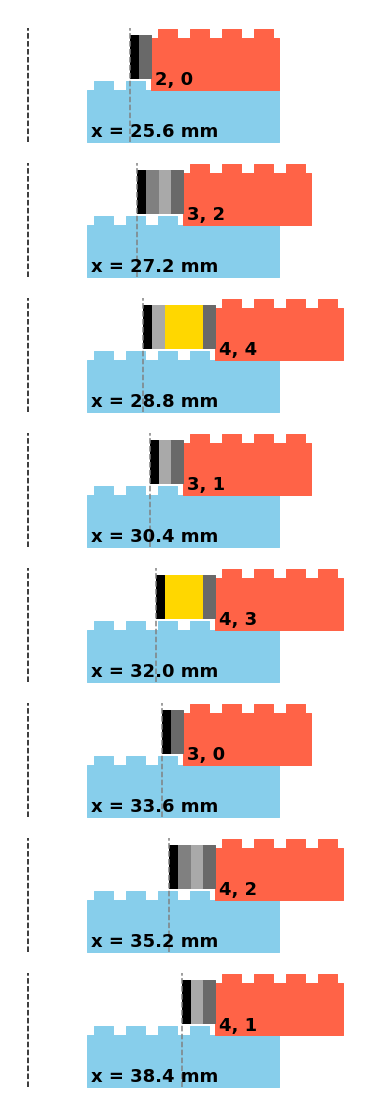

In [10]:
fig = plt.figure(figsize=(5,15))
ax=fig.add_axes([0,0,1,1])

i0 = 16
for iList in range(i0,i0+8):
    yPlot = -25 * iList + 200 * (i0//8)
    dx = dxListNew[iList]
    iTop = dx[0]
    iThin = dx[1]
    drawBase(ax, yPlot)
    drawTop(ax, iTop, yPlot)
    drawMount(ax, iTop, iThin, yPlot)

    R0 = 0 * P - 3 * h - h - 2
    R  = iTop * P - iThin * h - h - 2
    ax.plot((R0, R0), (yPlot + 0, yPlot + 21), '--', color="black")
    ax.plot((R, R), (yPlot + 0, yPlot + 21), '--', color="gray")
    ax.text(1, yPlot + 1, f"x = {R - R0:.1f} mm", 
            size=18, weight="bold")
    ax.text(1+iTop*P, yPlot + 10.5, f"{iTop}, {iThin}", 
            size=18, weight="bold")
ax.set_xlim(-20,70)
ax.set_ylim(-175,25)
ax.set_axis_off()
# ax.axis('equal')
fig.savefig(f"Figures/DetectorSpacing{i0}-{i0+7}.png", dpi=150)

In [7]:
xMin = -14.8
xMax = 23.6 + 3 * h + 4 * P
print(xMax, xMax - xMin)

65.2 80.0
